# Experiments :)

In [2]:
from utils import *
from bbq.polynomial import Polynomial
from bbq.bbq_code import BivariateBicycle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Polygon
import galois
from scipy.sparse import coo_matrix, hstack
# from ldpc import bdosd_decoder

In [503]:
a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 4, 4, 1)

In [415]:
a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 6, 6, 1)

In [ ]:
a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 6, 12, 1)

In [ ]:
def get_real_distance(self):
    hx, hz = self.hx, self.hz
    field = self.field
    GF = galois.GF(field)
    hx_gal, hz_gal = GF(hx), GF(hz)

    # We want ker(Hx)\rs(Hz)
    ker_hx = hx_gal.null_space()
    rs_hz = hz_gal.row_space()

    def is_in(vec, space) -> bool:
        matr = np.vstack([space, vec])
        return np.linalg.matrix_rank(matr) == space.shape[0]

    best_vector = GF(np.empty(ker_hx.shape[1], dtype=int))
    best_distance = ker_hx.shape[1] + 1

    # Brute force all vectors in ker(Hx)
    m = ker_hx.shape[0]
    print(m, ker_hx.shape[1], field)
    for ind in range(1, field**m):
        vec = GF(np.zeros(ker_hx.shape[1], dtype=int))
        print(f'Done ind = {ind}')
        for i in range(m):
            coef = (ind//field**i) % field
            ind -= coef * field**i
            vec += coef * ker_hx[i]

        # Check if vec is in rs(Hz)
        if is_in(vec, rs_hz):
            continue

        # Find distance
        distance = np.count_nonzero(vec)

        # Update best vector
        if distance < best_distance:
            best_vector = vec
            best_distance = distance

    return best_distance

In [123]:
# Testing...

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 2, 2, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.01
num_cycles = 2
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


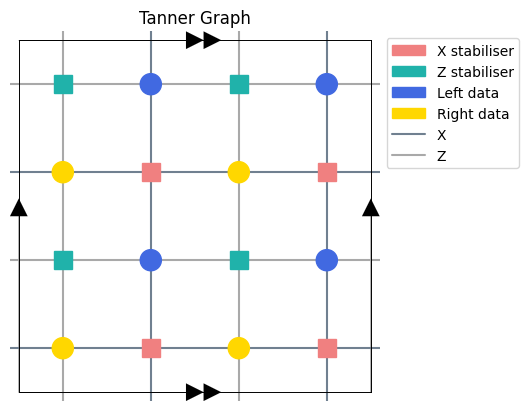

In [109]:
bb.draw()

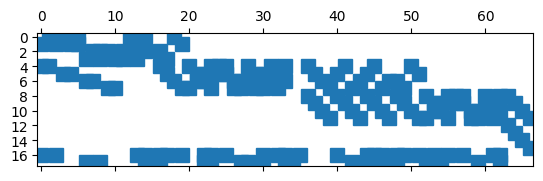

In [126]:
plt.spy(hx_eff);

In [99]:
_hx, _shx, _hz, _shz, _xprob, _zprob = construct_decoding_matrix(bb, circ, error_rates, num_cycles)

Number of X circuits is 30
x_circ is [('Prep_X', ('x_check', 0)), ('CNOT', ('data_left', 0), ('z_check', 0), 1), ('X', ('data_left', 0)), ('Idle', ('data_right', 0)), ('CNOT', ('x_check', 0), ('data_left', 0), 1), ('CNOT', ('data_right', 0), ('z_check', 0), 1), ('CNOT', ('x_check', 0), ('data_right', 0), 1), ('CNOT', ('data_left', 0), ('z_check', 0), 1), ('CNOT', ('x_check', 0), ('data_left', 0), 1), ('CNOT', ('data_right', 0), ('z_check', 0), 1), ('CNOT', ('x_check', 0), ('data_right', 0), 1), ('Meas_Z', ('z_check', 0)), ('Idle', ('data_left', 0)), ('Idle', ('data_left', 0)), ('Idle', ('data_right', 0)), ('Meas_X', ('x_check', 0)), ('Prep_Z', ('z_check', 0))]
Count: 0
Syndrome history: [1 1 0 1 0]
x_circ is [('Prep_X', ('x_check', 0)), ('CNOT', ('data_left', 0), ('z_check', 0), 1), ('X', ('z_check', 0)), ('Idle', ('data_right', 0)), ('CNOT', ('x_check', 0), ('data_left', 0), 1), ('CNOT', ('data_right', 0), ('z_check', 0), 1), ('CNOT', ('x_check', 0), ('data_right', 0), 1), ('CNOT', ('

In [98]:
def construct_decoding_matrix(self, circ : list, error_rates : dict, num_cycles : int = 1) -> np.ndarray:
    """Construct decoding matrix for a given syndrome circuit.
    
    Parameters
    ----------
    circ : list
        List of gates in one cycle of the syndrome circuit: ('CNOT', control_qubit, target_qubit, power), ('Idle', qubit), ('Meas_X', qubit), ('Meas_Z', qubit), ('Prep_X', qubit), ('Prep_Z', qubit).
    error_rate : dict
        Dictionary of error rates for keys [Meas, Prep, Idle, CNOT].
    num_cycles : int
        Number of cycles to repeat the syndrome circuit. Default is 1.
    
    Returns
    -------
    hx_eff : coo_matrix
        Decoding matrix for X stabilisers.    
    short_hx_eff : coo_matrix
        Decoding matrix for X stabilisers without columns for logicals.    
    hz_eff : coo_matrix
        Decoding matrix for Z stabilisers.    
    short_hz_eff : coo_matrix
        Decoding matrix for Z stabilisers without columns for logicals.
    channel_prob_x : list
        List of probabilities for each X syndrome, i.e. each column in hx_eff.    
    channel_prob_z : list
        List of probabilities for each Z syndrome, i.e. each column in hz_eff.
    """
    if not (isinstance(error_rates, dict)):
        raise TypeError("error_rates must be a dictionary")
    for key in error_rates.keys():
        if (key not in ['Meas', 'Prep', 'Idle', 'CNOT']) or (len(error_rates) != 4):
            raise ValueError("error_rates must have keys ['Meas', 'Prep', 'Idle', 'CNOT']")
        if not (isinstance(error_rates[key], float) and 0 <= error_rates[key] <= 1):
            raise ValueError("error_rates must have values between 0 and 1")
    if not (isinstance(num_cycles, int) and num_cycles > 0):
        raise TypeError("num_cycles must be a positive integer")

    l, m = self.l, self.m
    field = self.field
    qubits_dict, data_qubits = self.qubits_dict, self.data_qubits
    x_logicals, z_logicals = self.x_logicals, self.z_logicals
    x_checks, z_checks = self.x_checks, self.z_checks

    # Construct repeated circuit
    repeated_circ = circ * num_cycles

    # Single error circuits
    z_prob, z_circuit = [], []
    x_prob, x_circuit = [], []
    head = []
    tail = repeated_circ.copy()
    for gate in repeated_circ:
        # assert gate[0] in ['CNOT', 'Idle', 'Meas_X', 'Meas_Z', 'Prep_X', 'Prep_Z']
        if gate[0] == 'Meas_X':
            # Meas_X error only affects Z detectors
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['Meas'])
        if gate[0] == 'Meas_Z':
            # Meas_Z error only affects X detectors
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['Meas'])
        head.append(gate)
        tail.pop(0)
        # assert repeated_circ == head + tail
        if gate[0] == 'Prep_X':
            # Prep_X error only affects Z detectors
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['Prep'])
        if gate[0] == 'Prep_Z':
            # Prep_Z error only affects X detectors
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['Prep'])
        if gate[0] == 'Idle':
            # Idle error on Z detectors
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['Idle']*2/3)  # 3 possible Idle errors are X, Y, Z so Z is 2/3 (Y and Z)
            # Idle error on X detectors
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['Idle']*2/3)
        if gate[0] == 'CNOT':
            # Z error on control
            z_circuit.append(head + [('Z', gate[1])] + tail)
            z_prob.append(error_rates['CNOT']*4/15)  # possible CNOT errors are IX, IY, ..., ZZ so Z is 4/15 (IZ, IY, XZ and XY)
            # Z error on target
            z_circuit.append(head + [('Z', gate[2])] + tail)
            z_prob.append(error_rates['CNOT']*4/15)
            # Z error on both
            z_circuit.append(head + [('ZZ', gate[1], gate[2])] + tail)
            z_prob.append(error_rates['CNOT']*4/15)
            # X error on control
            x_circuit.append(head + [('X', gate[1])] + tail)
            x_prob.append(error_rates['CNOT']*4/15)
            # X error on target
            x_circuit.append(head + [('X', gate[2])] + tail)
            x_prob.append(error_rates['CNOT']*4/15)
            # X error on both
            x_circuit.append(head + [('XX', gate[1], gate[2])] + tail)
            x_prob.append(error_rates['CNOT']*4/15)

    # Execute each noisy X circuit and compute syndrome
    # Add two noiseless syndrome cycles to end
    cnt = 0
    Hx_dict = {}
    print(f'Number of X circuits is {len(x_circuit)}')
    for x_circ in x_circuit:
        print(f'x_circ is {x_circ}')
        syndrome_history, state, syndrome_map, err_cnt = self._simulate_x_circuit(x_circ + circ + circ)
        assert err_cnt == 1
        assert len(syndrome_history) == l * m * (num_cycles + 2)

        # Compute final state of data qubits and logical effect
        state_data_qubits = [state[qubits_dict[qubit]] for qubit in data_qubits]
        syndrome_final_logical = (np.array(z_logicals) @ state_data_qubits) % field

        # Syndrome sparsification, i.e. only keep syndrome entries that change from previous cycle
        syndrome_history_copy = syndrome_history.copy()
        for check in z_checks:
            pos = syndrome_map[check]
            assert len(pos) == num_cycles + 2
            for row in range(1, num_cycles + 2):
                syndrome_history[pos[row]] += syndrome_history_copy[pos[row-1]]
        syndrome_history %= field

        # Combine syndrome_history and syndrome_final_logical
        syndrome_history_augmented = np.hstack([syndrome_history, syndrome_final_logical])
        print(f'Count: {cnt}')
        print(f'Syndrome history: {syndrome_history_augmented}')

        # Hx_dict maps flagged Z stabilisers to corresponding noisy circuit, i.e. Hx_dict[flagged_z_stab] = [noisy_circuit_1, noisy_circuit_2, ...]
        supp = tuple(np.nonzero(syndrome_history_augmented)[0])
        if supp in Hx_dict:
            Hx_dict[supp].append(cnt)
        else:
            Hx_dict[supp] = [cnt]
        cnt += 1
    
    print(f'Hx_dict is {Hx_dict}')

    first_logical_row_x = l * m * (num_cycles + 2)
    num_x_errors = len(Hx_dict)  # Number of distinct X syndrome histories
    k = len(x_logicals) # Number of logical qubits
    hx_eff, short_hx_eff = [], []
    channel_prob_x = []
    for supp in Hx_dict:
        new_col = np.zeros((l * m * (num_cycles + 2) + k, 1), dtype=int)  # With the augmented part for logicals
        new_col_short = np.zeros((l * m * (num_cycles + 2), 1), dtype=int)
        new_col[list(supp), 0] = 1  # 1 indicates which stabiliser is flagged
        new_col_short[:, 0] = new_col[0:first_logical_row_x, 0]
        hx_eff.append(coo_matrix(new_col))
        short_hx_eff.append(coo_matrix(new_col_short))
        channel_prob_x.append(np.sum([x_prob[i] for i in Hx_dict[supp]]))  # Probability of a given x syndrome
    hx_eff = hstack(hx_eff)  # Column = flagged stabilisers, row = noisy circuit
    short_hx_eff = hstack(short_hx_eff)  # Shortened hx_eff without columns for logicals

    # Execute each noisy Z circuit and compute syndrome
    # Add two noiseless syndrome cycles to end
    cnt = 0
    Hz_dict = {}
    for z_circ in z_circuit:
        syndrome_history, state, syndrome_map, err_cnt = self._simulate_z_circuit(z_circ + circ + circ)
        assert err_cnt == 1
        assert len(syndrome_history) == l * m * (num_cycles + 2)

        # Compute final state of data qubits and logical effect
        state_data_qubits = [state[qubits_dict[qubit]] for qubit in data_qubits]
        syndrome_final_logical = (np.array(x_logicals) @ state_data_qubits) % field

        # Syndrome sparsification, i.e. only keep syndrome entries that change from previous cycle
        syndrome_history_copy = syndrome_history.copy()
        for check in x_checks:
            pos = syndrome_map[check]
            assert len(pos) == num_cycles + 2
            for row in range(1, num_cycles + 2):
                syndrome_history[pos[row]] += syndrome_history_copy[pos[row-1]]
        syndrome_history %= field

        # Combine syndrome_history and syndrome_final_logical
        syndrome_history_augmented = np.hstack([syndrome_history, syndrome_final_logical])

        # Hz_dict maps flagged X stabilisers to corresponding noisy circuit, i.e. Hz_dict[flagged_x_stab] = [noisy_circuit_1, noisy_circuit_2, ...]
        supp = tuple(np.nonzero(syndrome_history_augmented)[0])
        if supp in Hz_dict:
            Hz_dict[supp].append(cnt)
        else:
            Hz_dict[supp] = [cnt]
        cnt += 1

    first_logical_row_z = l * m * (num_cycles + 2)
    num_z_errors = len(Hz_dict)  # Number of distinct Z syndrome histories
    hz_eff, short_hz_eff = [], []
    channel_prob_z = []
    for supp in Hz_dict:
        new_col = np.zeros((l * m * (num_cycles + 2) + k, 1), dtype=int)  # With the augmented part for logicals
        new_col_short = np.zeros((l * m * (num_cycles + 2), 1), dtype=int)
        new_col[list(supp), 0] = 1  # 1 indicates which stabiliser is flagged
        new_col_short[:, 0] = new_col[0:first_logical_row_z, 0]
        hz_eff.append(coo_matrix(new_col))
        short_hz_eff.append(coo_matrix(new_col_short))
        channel_prob_z.append(np.sum([z_prob[i] for i in Hz_dict[supp]]))  # Probability of a given z syndrome
    hz_eff = hstack(hz_eff)  # Row = flagged stabilisers, column = noisy circuit
    short_hz_eff = hstack(short_hz_eff)  # Shortened hz_eff without columns for logicals

    return hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z

## Tanner Graphs

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2


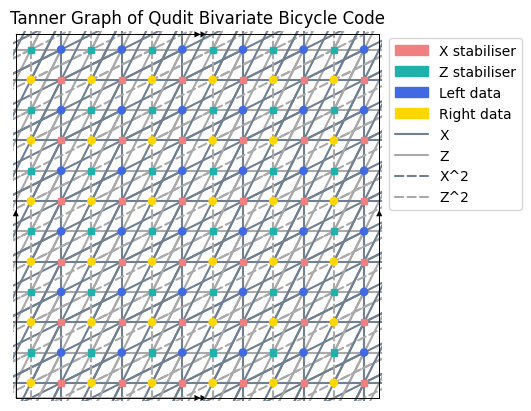

In [595]:
# Qubit Gross code

a = Polynomial(3, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(3, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 6, 6, 1, 'Qudit Bivariate Bicycle Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

In [596]:
len(bb.x_logicals)

8

In [597]:
[np.count_nonzero(stab) for stab in bb.x_logicals]

[17, 17, 21, 16, 16, 22, 15, 15]

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 4x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 4x^0y^1 + 0x^1y^0 + 0x^1y^1


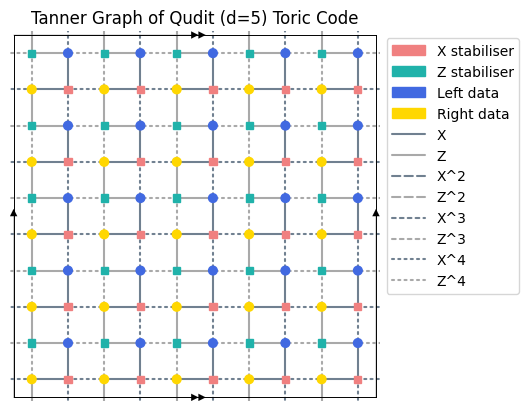

In [511]:
# Qubit Toric code
 
a = Polynomial(5, np.array([[1, 0], [4, 0]]))
b = Polynomial(5, np.array([[1, 4], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1, 'Qudit (d=5) Toric Code')
print(bb)
bb.draw()

In [512]:
len(bb.x_logicals)

2

In [518]:
[np.count_nonzero(stab) for stab in bb.x_logicals]

[7, 5]

c:\Users\elean\Documents\Quantum Computing PhD\ITP\IP BBQ\qudit-bivariate-bicycle\qudit-bb\bbq.py:66: ValueWarning: No X logicals found for these parameters.
  warnings.warn("No X logicals found for these parameters.", ValueWarning)
c:\Users\elean\Documents\Quantum Computing PhD\ITP\IP BBQ\qudit-bivariate-bicycle\qudit-bb\bbq.py:68: ValueWarning: No Z logicals found for these parameters.
  warnings.warn("No Z logicals found for these parameters.", ValueWarning)


Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 4x^1y^0 + 0x^1y^1
b(x, y) = 3x^0y^0 + 4x^0y^1 + 0x^1y^0 + 0x^1y^1


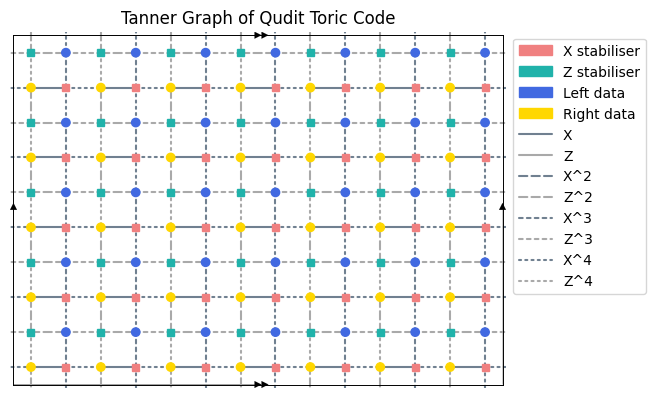

In [3]:
# Qudit Toric code
 
a = Polynomial(5, np.array([[1, 0], [4, 0]]))
b = Polynomial(5, np.array([[3, -1], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 7, 2, 'Qudit Toric Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2


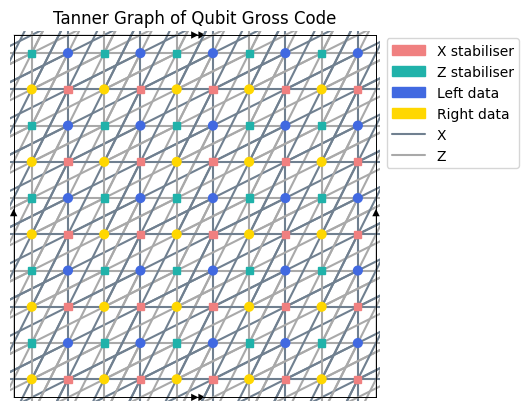

In [4]:
# Qubit Gross code

a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1, 'Qubit Gross Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2


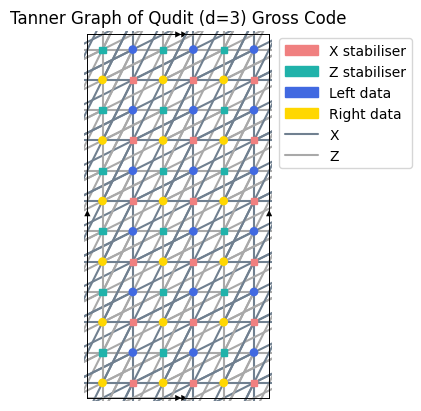

In [238]:
# Qudit Gross code

a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 6, 3, 1, 'Qudit (d=3) Gross Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 2x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 2x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2


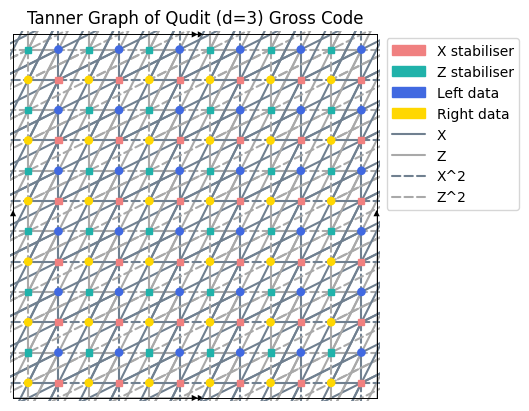

In [520]:
# Qudit Gross code

a = Polynomial(3, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [2, 0, 0, 0]]))
b = Polynomial(3, np.array([[0, 1, 2], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 6, 6, 1, 'Qudit (d=3) Gross Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

In [521]:
len(bb.x_logicals)

8

In [522]:
[np.count_nonzero(stab) for stab in bb.x_logicals]

[17, 17, 21, 16, 16, 22, 15, 15]

Bivariate Bicycle code for
a(x, y) = 2x^0y^0 + 0x^0y^1 + 2x^0y^2 + 0x^0y^3 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3 + 0x^3y^0 + 2x^3y^1 + 0x^3y^2 + 0x^3y^3
b(x, y) = 0x^0y^0 + 2x^0y^1 + 0x^0y^2 + 0x^0y^3 + 0x^1y^0 + 0x^1y^1 + 2x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3


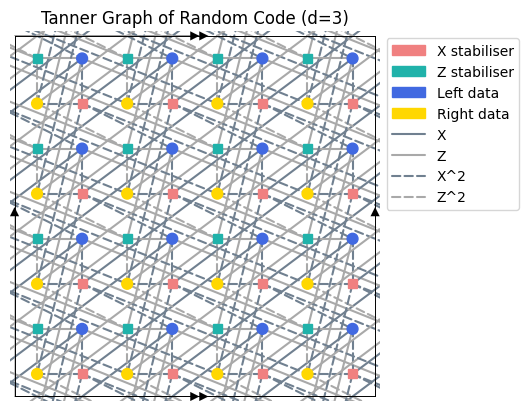

In [523]:
# Random code

b = Polynomial(3, np.array([[0, 2, 0, 0], [0, 0, 2, 0], [1, 0, 0, 0]]))
a = Polynomial(3, np.array([[2, 0, 2, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 2, 0, 0]]))
bb = BivariateBicycle(a, b, 4, 4, 2, 'Random Code (d=3)')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

In [524]:
len(bb.x_logicals)

2

In [525]:
[np.count_nonzero(stab) for stab in bb.x_logicals]

[11, 9]

## Simulation

#### BP Decoder

In [ ]:
def simulate(self, iterations, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z):
    """Simulate the code for given iterations.
    
    Parameters
    ----------
    iterations : int
        The number of iterations.
    hx_eff : nd.array
        The effective X parity check matrix.
    short_hx_eff : nd.array
        The effective X parity check matrix without logicals.
    hz_eff : nd.array
        The effective Z parity check matrix.
    short_hz_eff : nd.array
        The effective Z parity check matrix without logicals.
    channel_prob_x : list
        The probability of each X error mechanism.
    channel_prob_z : list
        The probability of each Z error mechanism.

    Returns
    -------
    success_rate : float
        The proportion of successful runs of the simulation.
    """
    pass

def bp_decode(self, syndrome, prior, h_eff, m_iter):
    """Decode the syndrome using BP.
    
    Parameters
    ----------
    syndrome : nd.array
        The syndrome of the error.
    prior : list
        The probability of each error mechanism.
    h_eff : nd.array
        The effective parity check matrix, where columns = error mechanism and rows = syndrome (flagged stabilisers).
    m_iter : int
        The maximum number of iterations.

    Returns
    -------
    error : nd.array
        The error.
    success : bool
        Whether the decoding was successful.
    """
    if not isinstance(syndrome, np.ndarray):
        raise TypeError('syndrome must be a numpy array')
    if not isinstance(prior, list):
        raise TypeError('prior must be a list')
    if not (isinstance(m_iter, int) and m_iter > 0):
        raise ValueError('m_iter must be a positive integer')

    qubits_dict = self.qubits_dict
    data_qubits, x_checks, z_checks = self.data_qubits, self.x_checks, self.z_checks

    # Step 0: initialisation
    # Q[k, i] is the message passed from error k to check i
    Q = np.zeros(())
    # P[i, k] is the message passed from check i to error k

    # Step 1: pass check to error messages
    # Step 2: pass error to check messages
    # Step 3: calculate posterior and make hard decision on errors
    # Step 4: check convergence or terminate

def _check_to_error_message(self, Q):
    """Pass messages from check nodes to error nodes.
    
    Parameters
    ----------
    Q : nd.array
        Q[k, i] is the message passed from error k to check i.

    Returns
    -------
    P : nd.array
        P[i, k] is the message passed from check i to error k.
    """
    pass

def _error_to_check_message(self, P):
    """Pass messages from error nodes to check nodes.
    
    Parameters
    ----------
    P : nd.array
        P[i, k] is the message passed from check i to error k.

    Returns
    -------
    Q : nd.array
        Q[k, i] is the message passed from error k to check i.
    """
    pass

def _calculate_posterior(self, P):
    """Calculate the posterior probability of the error.
    
    Parameters
    ----------
    P : nd.array
        P[i, k] is the message passed from check i to error k.

    Returns
    -------
    error : nd.array
        The error.
    """
    pass

#### D+OSD

In [46]:
def simulate(self, iterations, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=False):
    """Simulate the code for given iterations.
    
    Parameters
    ----------
    iterations : int
        The number of iterations of the simulation.
    circ : list
        The syndrome measurement circuit.
    error_rates : dict
        Dictionary with error rates with keys ['Meas', 'Prep', 'Idle', 'CNOT'].
    num_cycles : int
        Number of cycles to repeat the syndrome circuit.
    hx_eff : nd.array
        The effective X parity check matrix.
    short_hx_eff : nd.array
        The effective X parity check matrix without logicals.
    hz_eff : nd.array
        The effective Z parity check matrix.
    short_hz_eff : nd.array
        The effective Z parity check matrix without logicals.
    channel_prob_x : list
        The probability of each X error mechanism.
    channel_prob_z : list
        The probability of each Z error mechanism.

    Returns
    -------
    float
        Logical error rate.
    """
    field = self.field
    l, m = self.l, self.m
    qubits_dict = self.qubits_dict
    data_qubits = self.data_qubits
    x_checks, z_checks = self.x_checks, self.z_checks
    x_logicals, z_logicals = self.x_logicals, self.z_logicals
    hx_eff, hz_eff = hx_eff.toarray(), hz_eff.toarray()
    short_hx_eff, short_hz_eff = short_hx_eff.toarray(), short_hz_eff.toarray()
    first_logical_row = l * m * (num_cycles + 2)
    k = len(x_logicals)

    # Set up priors
    x_prior = np.zeros((len(channel_prob_x), field), dtype=int)
    z_prior = np.zeros((len(channel_prob_z), field), dtype=int)

    for i, prob in enumerate(channel_prob_x):
        x_prior[i, 0] = 1 - prob
        for j in range(1, field):
            x_prior[i, j] = prob / (field - 1)
    for i, prob in enumerate(channel_prob_z):
        z_prior[i, 0] = 1 - prob
        for j in range(1, field):
            z_prior[i, j] = prob / (field - 1)

    # Run for given number of iterations
    success_count = 0
    for _ in range(iterations):

        # Generate noisy circuit
        noisy_circ, err_cnt = self._generate_noisy_circuit(circ * num_cycles, error_rates)
        if verbose:
            print(f'Number of errors: {err_cnt}')

        # Run X decoding and Z decosing sequentially
        x_success, z_success = False, False

        # Correct X errors
        x_syndrome_history, x_state, x_syndrome_map, x_err_count = self._simulate_x_circuit(noisy_circ + circ + circ)
        # print(f'x_syndrome_history: {x_syndrome_history}')
        x_state_data_qubits = [x_state[qubits_dict[qubit]] for qubit in data_qubits]
        x_syndrome_final_logical = (np.array(z_logicals) @ x_state_data_qubits) % field
        # Syndrome sparsification
        x_syndrome_history_copy = x_syndrome_history.copy()
        for check in z_checks:
            pos = x_syndrome_map[check]
            assert len(pos) == num_cycles + 2
            for row in range(1, num_cycles + 2):
                x_syndrome_history[pos[row]] += x_syndrome_history_copy[pos[row-1]]
        x_syndrome_history %= field
        x_error = dijkstra_osd_decode(self, x_syndrome_history, x_prior, short_hx_eff)

        # Check logical effect
        x_syndrome_history_augmented_guessed = (hx_eff @ x_error) % field
        x_syndrome_final_logical_guessed = x_syndrome_history_augmented_guessed[first_logical_row: first_logical_row + k]
        x_success = np.array_equal(x_syndrome_final_logical_guessed, x_syndrome_final_logical)

        # Correct Z errors
        if x_success:
            z_syndrome_history, z_state, z_syndrome_map, z_err_count = self._simulate_z_circuit(noisy_circ + circ + circ)
            # print(f'z_syndrome_history: {z_syndrome_history}')
            z_state_data_qubits = [z_state[qubits_dict[qubit]] for qubit in data_qubits]
            z_syndrome_final_logical = (np.array(x_logicals) @ z_state_data_qubits) % field
            # Syndrome sparsification
            z_syndrome_history_copy = z_syndrome_history.copy()
            for check in x_checks:
                pos = z_syndrome_map[check]
                assert len(pos) == num_cycles + 2
                for row in range(1, num_cycles + 2):
                    z_syndrome_history[pos[row]] += z_syndrome_history_copy[pos[row-1]]
            z_syndrome_history %= field
            z_error = dijkstra_osd_decode(self, z_syndrome_history, z_prior, short_hz_eff)

            # Check logical effect
            z_syndrome_history_augmented_guessed = (hz_eff @ z_error) % field
            z_syndrome_final_logical_guessed = z_syndrome_history_augmented_guessed[first_logical_row: first_logical_row + k]
            z_success = np.array_equal(z_syndrome_final_logical_guessed, z_syndrome_final_logical)

        # Check if the decoding was successful
        success = x_success and z_success

        if success:
            success_count += 1

    return 1 - (success_count / iterations)

In [ ]:
def dijkstra_osd_decode(self, syndrome_history, prior, h_eff, debug = False):
    """Decode the syndrome using D+OSD.
    
    Parameters
    ----------
    syndrome_history : nd.array
        The syndrome of the error.
    prior : nd.array
        The probability of each error mechanism.
    h_eff : nd.array
        The effective parity check matrix, where columns = error mechanism and rows = syndrome (flagged stabilisers).

    Returns
    -------
    error : nd.array
        The estimated error.
    """
    if not isinstance(syndrome_history, np.ndarray):
        raise TypeError('syndrome must be a numpy array')
    if not isinstance(prior, np.ndarray):
        raise TypeError('prior must be a np.ndarray')

    field = self.field
    qubits_dict = self.qubits_dict
    data_qubits, x_checks, z_checks = self.data_qubits, self.x_checks, self.z_checks

    m, n = h_eff.shape

    # Mini-Dijkstra
    check_distances = np.ones(m) * n
    error_distances = np.ones(n) * n

    # Set the distance each detector is from an error
    for c in syndrome_history.nonzero()[0]:
        check_distances[c] = 0

    update_made = True
    while update_made:
        update_made = False
        for c in range(m):
            current_distance = check_distances[c]
            for e in np.nonzero(h_eff[c])[0]:
                if current_distance + 1 < error_distances[e]:
                    error_distances[e] = current_distance + 1
                    update_made = True

        for e in range(n):
            current_distance = error_distances[e]
            for c in np.nonzero(h_eff[:,e])[0]:
                if current_distance + 1 < check_distances[c]:
                    check_distances[c] = current_distance + 1
                    update_made = True

    certainties = error_distances

    # Sort errors by how certain we are of their values (most to least)
    col_rank_perm = np.argsort(certainties)
    col_rank_inv_perm = np.empty_like(col_rank_perm)
    col_rank_inv_perm[col_rank_perm] = np.arange(len(col_rank_perm))

    # Create Galois field elements
    GF = galois.GF(field)
    
    # Convert H and syndrome to Galois field arrays
    H_gf = GF(h_eff.copy())
    syndrome_gf = GF(syndrome_history.copy())
    
    # Order the columns of h_gf and prior according to the ranking
    H_ordered_gf = H_gf[:, col_rank_perm]
    priors_perm = prior[col_rank_perm]

    # Find the reduced row echelon form (RREF) and identify pivot columns
    H_rref_gf, syndrome_rref_gf, pivot_cols = rref_with_pivots(H_ordered_gf, syndrome_gf)
    m_ind = H_rref_gf.shape[0]
    non_pivot_cols = [i for i in range(n) if i not in pivot_cols]

    # Select the first rank(h_gf) linearly independent columns as basis set in P, others in B
    P = H_rref_gf[:, pivot_cols]
    assert P.shape == (m_ind, m_ind)
    B = H_rref_gf[:, non_pivot_cols]

    def sln_from(g):
        assert g.shape == (n - m_ind,)
        remainder =  syndrome_rref_gf - B @ g
        fix = np.linalg.solve(P, remainder)
        assert (P @ fix + B @ g == syndrome_rref_gf).all()

        score = 0
        sln = GF.Zeros(n)
        # Find prob of basis set
        for i in range(m_ind):
            p = priors_perm[pivot_cols[i], fix[i]]
            sln[pivot_cols[i]] = fix[i]
            if p > 0:
                score += np.log(p)
            else:
                p -= 1000
        
        for i in range(n - m_ind):
            p = priors_perm[non_pivot_cols[i], g[i]]
            sln[non_pivot_cols[i]] = g[i]
            if p > 0:
                score += np.log(p)
            else:
                p -= 1000

        # Check sln makes correct syndrome
        assert (H_rref_gf @ sln == syndrome_rref_gf).all()
        assert (H_gf @ sln[col_rank_inv_perm] == syndrome_gf).all()
    
        return np.array(sln[col_rank_inv_perm]), score

    # OSD_0 solution
    best_solution, best_score = sln_from(GF.Zeros(n - m_ind))
    pivot_col_labels = {col_rank_perm[c]: int(error_distances[col_rank_perm[c]]) for c in pivot_cols}
    
    # print(f'for debugging: {best_solution}, {True}, {[col_rank_perm[i] for i in pivot_cols]}, {pivot_col_labels}')
    
    return best_solution

In [144]:
def rref_with_pivots(A, v, x = None):
    """
    Perform Gaussian elimination to find the reduced row echelon form (RREF).
    Also identifies the pivot columns.
    Also reduces a vector to keep a linear system invariant.
    
    Parameters
    ----------
    A : Galois field array
        Galois field matrix to row reduce
        
    Returns
    -------
    A_rref : Galois field array
        Row-reduced form of A
    pivots : list
        Indices of pivot columns
    """
    # Get a copy to avoid modifying the original
    A_rref = A.copy()
    v_rref = v.copy()
    m, n = A_rref.shape
    assert v.shape == (m,)
    # assert (A_rref @ x == v_rref).all()
    
    # Track the pivot positions
    pivot_cols = []
    pivot_rows = []
    
    # Iterate through columns
    for c in range(n):
        # Find pivot in column c
        for r in range(m):
            if A_rref[r, c] != 0 and r not in pivot_rows:
                break
        else:
            continue

        # Record this column as a pivot column
        pivot_cols.append(c)
        pivot_rows.append(r)
        
        # Scale the pivot row to make the pivot element 1
        pivot = A_rref[r, c]
        A_rref[r] = A_rref[r] / pivot
        v_rref[r] = v_rref[r] / pivot
        
        # Eliminate other elements in the pivot column
        for i in range(m):
            if i != r and A_rref[i, c] != 0:
                v_rref[i] = v_rref[i] - A_rref[i,c] * v_rref[r]
                A_rref[i] = A_rref[i] - A_rref[i, c] * A_rref[r]
        
        # If we've exhausted all rows, we're done
        if len(pivot_rows) == m:
            break
    
    # if len(pivot_rows) < A.shape[0]:
    #     print("Matrix is not full rank.")

    return A_rref[sorted(pivot_rows)], v_rref[sorted(pivot_rows)], pivot_cols

In [145]:
# Testing...

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 3, 3, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.01
num_cycles = 3
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


In [ ]:
# Code capacity model

failures = 0
num_trials = 500
# results = {}

for d in [9]:
    bb = BivariateBicycle(a, b, d, d, 1)
    lz = bb.z_logicals
    res = []
    for p in np.logspace(-3, -1, 10):
        failures = 0
        for _ in range(num_trials):
            # Generate syndrome
            n_qudits = bb.hx.shape[1]
            error = np.zeros(n_qudits, dtype=int)
            error_mask = np.random.rand(n_qudits) < p
            for i in np.where(error_mask)[0]:
                error[i] = np.random.randint(1, bb.field)
            syndrome = (bb.hx @ error) % bb.field

            # Construct error probability
            channel_prob_x = np.ones(bb.hx.shape[1])
            channel_prob_x *= (1/bb.hx.shape[1]) * p

            x_prior = np.zeros((len(channel_prob_x), 2), dtype=int)

            for i, prob in enumerate(channel_prob_x):
                x_prior[i, 0] = 1 - prob
                for j in range(1, 2):
                    x_prior[i, j] = prob / (2 - 1)

            # Decode
            guessed_error = dijkstra_osd_decode(bb, syndrome, x_prior, bb.hx)
            error_difference = (error - guessed_error) % 2
            logical_effect = (np.array(lz) @ error_difference) % 2

            # Check success
            if np.any(logical_effect != 0):
                failures += 1
        res.append(failures/num_trials)
        print(f'Completed d={d}, p={p}')
    results[d] = res
    # print(f'Completed d={d}')

Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}
Completed d={d}, p={p}


In [190]:
save_results = results.copy()

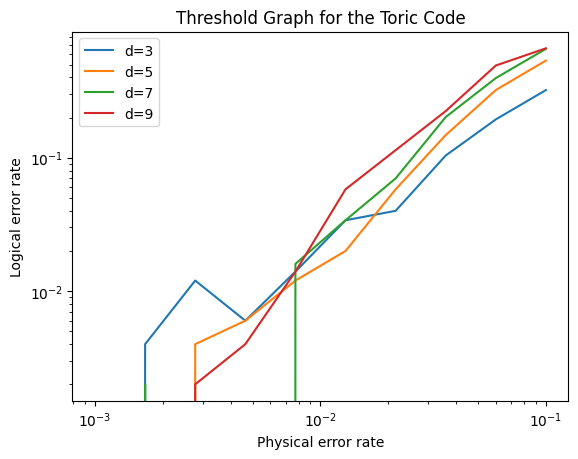

In [192]:
x = np.logspace(-3, -1, 10)
for d in [3, 5, 7, 9]:
    plt.loglog(x, results[d])
plt.legend(['d=3', 'd=5', 'd=7', 'd=9'])
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.title('Threshold Graph for the Toric Code');

In [193]:
# Code capacity model

failures = 0
num_trials = 1000
results_smaller = {}

for d in [3, 5, 7]:
    bb = BivariateBicycle(a, b, d, d, 1)
    lz = bb.z_logicals
    res = []
    for p in np.logspace(-4, -2, 5):
        failures = 0
        for _ in range(num_trials):
            # Generate syndrome
            n_qudits = bb.hx.shape[1]
            error = np.zeros(n_qudits, dtype=int)
            error_mask = np.random.rand(n_qudits) < p
            for i in np.where(error_mask)[0]:
                error[i] = np.random.randint(1, bb.field)
            syndrome = (bb.hx @ error) % bb.field

            # Construct error probability
            channel_prob_x = np.ones(bb.hx.shape[1])
            channel_prob_x *= (1/bb.hx.shape[1]) * p

            x_prior = np.zeros((len(channel_prob_x), 2), dtype=int)

            for i, prob in enumerate(channel_prob_x):
                x_prior[i, 0] = 1 - prob
                for j in range(1, 2):
                    x_prior[i, j] = prob / (2 - 1)
            # channel_prob_z = np.ones(bb.hx.shape[1])
            # channel_prob_z *= (1/bb.hz.shape[1]) * p

            # Decode
            guessed_error = dijkstra_osd_decode(bb, syndrome, x_prior, bb.hx)
            error_difference = (error - guessed_error) % 2
            logical_effect = (np.array(lz) @ error_difference) % 2

            # Check success
            if np.any(logical_effect != 0):
                failures += 1
        res.append(failures/num_trials)
        print(f'Completed d={d}, p={p}')
    results_smaller[d] = res
    # print(f'Completed d={d}')

Completed d=3, p=0.0001
Completed d=3, p=0.00031622776601683794
Completed d=3, p=0.001
Completed d=3, p=0.0031622776601683794
Completed d=3, p=0.01
Completed d=5, p=0.0001
Completed d=5, p=0.00031622776601683794
Completed d=5, p=0.001
Completed d=5, p=0.0031622776601683794
Completed d=5, p=0.01
Completed d=7, p=0.0001
Completed d=7, p=0.00031622776601683794
Completed d=7, p=0.001
Completed d=7, p=0.0031622776601683794
Completed d=7, p=0.01


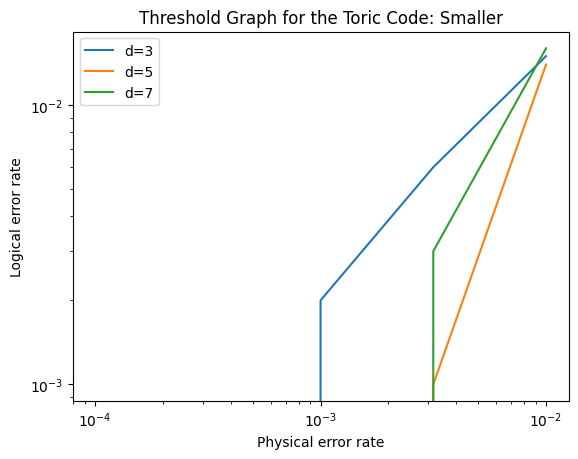

In [194]:
x = np.logspace(-4, -2, 5)
for d in [3, 5, 7]:
    plt.loglog(x, results_smaller[d])
plt.legend(['d=3', 'd=5', 'd=7'])
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.title('Threshold Graph for the Toric Code: Smaller');

In [56]:
simulate(bb, 10, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=True)

Number of errors: 19
Number of errors: 20
Number of errors: 20
Number of errors: 21
Number of errors: 17
Number of errors: 10
Number of errors: 17
Number of errors: 19
Number of errors: 15
Number of errors: 22


0.9

In [57]:
# Threshold graphs 5x5x5

success_rate = []

for p in np.linspace(0.001, 0.01, 10):
    error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
    success_rate.append(simulate(bb, 10, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z))

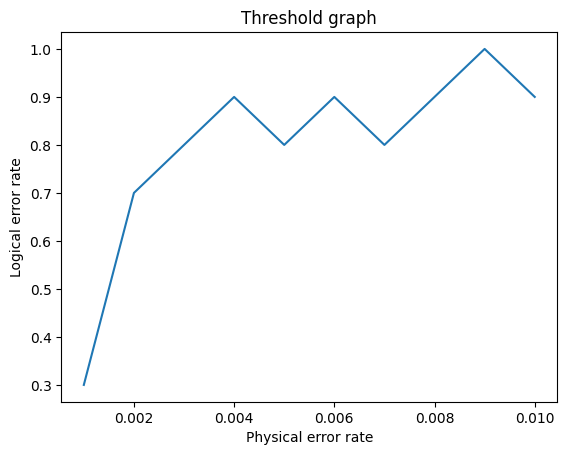

In [58]:
# qubit toric 5x5x5

plt.plot(np.linspace(0.001, 0.01, 10), success_rate)
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.title('Threshold graph');

In [12]:
# BIG threshold graph

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))

x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']

results = []

for d in [3, 5, 7, 9]:
    bb = BivariateBicycle(a, b, d, d, 1)
    num_cycles = d
    for p in np.linspace(0.001, 0.01, 25):
        error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
        circ = bb.construct_sm_circuit(x_order, z_order)
        hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)
        logical_error_rate = simulate(bb, 100, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z)
        results.append([d, p, logical_error_rate])
    print(f'Completed d = {d}')

Completed d = 3


KeyboardInterrupt: 

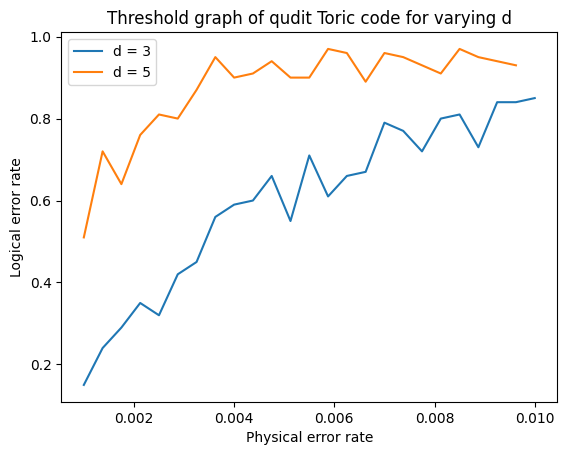

In [41]:
# BIG threshold graph

x = np.linspace(0.001, 0.01, 25)

plt.plot(x, results_3)
plt.plot(x[0:24], results_5)

plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend(['d = 3', 'd = 5'])
plt.title('Threshold graph of qudit Toric code for varying d');

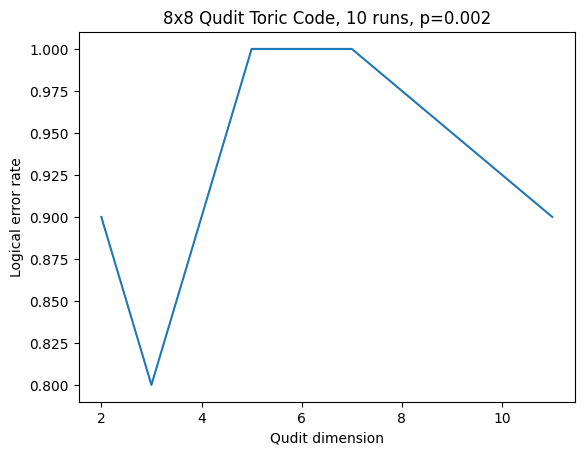

In [ ]:
# Testing qudit dimension

plt.plot([2, 3, 5, 7, 11], [0.9, 0.8, 1.0, 1.0, 0.9])
plt.xlabel('Qudit dimension')
plt.ylabel('Logical error rate')
plt.title('8x8 Qudit Toric Code, 10 runs, p=0.002');

In [241]:
# Threshold graphs

success_rate = []

for p in np.linspace(0.001, 0.01, 10):
    error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
    success_rate.append(simulate(bb, 50, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z))

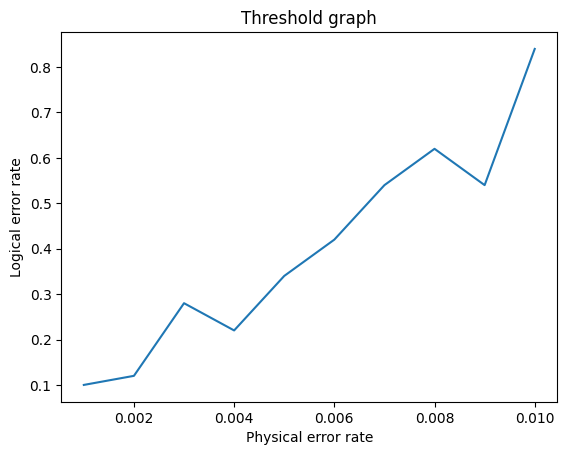

In [ ]:
# qutrit 8x8

plt.plot(np.linspace(0.001, 0.01, 10), success_rate)
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.title('Threshold graph');

In [529]:
# Testing qubit Toric code (takes 3s)

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.003
num_cycles = 1
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


In [3]:
# Testing qudit Toric code (takes 15s)

a = Polynomial(3, np.array([[2, 0], [1, 0]]))
b = Polynomial(3, np.array([[1, 2], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.003
num_cycles = 5
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 2x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 2x^0y^1 + 0x^1y^0 + 0x^1y^1


In [4]:
# Testing qubit Gross code (takes 23s)

a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 6, 6, 1)
x_order = ['Idle', 1, 4, 3, 5, 0, 2]
z_order = [3, 5, 0, 1, 2, 4, 'Idle']
p = 0.003
num_cycles = 3
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2


In [542]:
a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(b, a, 6, 6, 1)
x_order = ['Idle', 1, 4, 3, 5, 0, 2]
z_order = [3, 5, 0, 1, 2, 4, 'Idle']
p = 0.003
num_cycles = 1
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2
b(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3


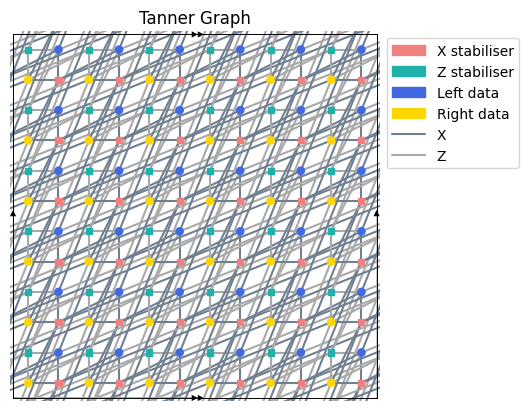

In [543]:
bb.draw()

In [527]:
def _monomials(self):
    """Construct monomials for the Bivariate Bicycle code."""
    a, b = self.a, self.b
    l, m = self.l, self.m
    A, B = [], []
    row, col = np.nonzero(a.coefficients)
    for i in range(len(row)):
        poly_coef = np.zeros((a.coefficients.shape), dtype=int)
        poly_coef[row[i], col[i]] = a.coefficients[row[i], col[i]]
        poly = Polynomial(a.field, poly_coef)
        A.append(poly(l, m))
    row, col = np.nonzero(b.coefficients)
    for i in range(len(row)):
        poly_coef = np.zeros((b.coefficients.shape), dtype=int)
        poly_coef[row[i], col[i]] = b.coefficients[row[i], col[i]]
        poly = Polynomial(b.field, poly_coef)
        B.append(poly(l, m))
    return A, B

In [544]:
A, B = _monomials(bb)

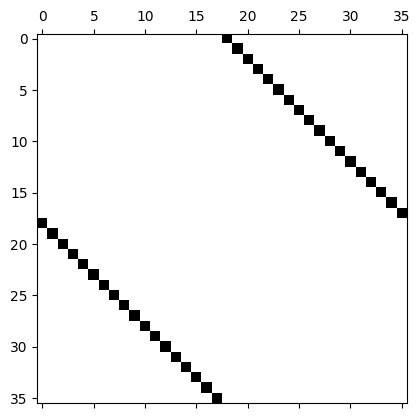

In [548]:
plt.spy(A[2]);